In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from ast import literal_eval
import time
import requests

In [29]:
# Import the dataset
data = pd.read_csv('http://fantasyoverlord.com/FPL/DataWithForecasts',encoding='iso8859_2')
data.index = range(1, data.shape[0] + 1)
data.head(10)

,FirstName,Surname,PositionsList,Team,Cost,PointsLastRound,TotalPoints,AveragePoints,AveragePointsPerDollar,TotalPointsPerDollar,...,GW29Forecast,GW30Forecast,GW31Forecast,GW32Forecast,GW33Forecast,GW34Forecast,GW35Forecast,GW36Forecast,GW37Forecast,GW38Forecast
1,NaN,A.Armstrong,FWD,SOU,5500000,4,5,2.5,4.545455e-07,9.090909e-07,...,1.9,1.2,3.5,1.2,1.5,1.2,1.2,1.4,1.2,3.5
2,NaN,A.Doucoure,MID,EVE,5500000,1,3,1.5,2.727273e-07,5.454545e-07,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
3,Brenden,Aaronson,MID,LEE,5500000,1,3,1.5,2.727273e-07,5.454545e-07,...,0.8,1.1,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
4,NaN,Adama,MID,WOL,5500000,1,1,1.0,1.818182e-07,1.818182e-07,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
5,Che,Adams,FWD,SOU,6400000,2,2,2.0,3.125000e-07,3.125000e-07,...,1.3,1.0,2.8,1.0,1.0,1.0,1.0,1.0,1.0,2.8
6,Tyler,Adams,MID,LEE,5000000,2,3,1.5,3.000000e-07,6.000000e-07,...,0.8,1.1,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
7,NaN,Adrian,GLK,LIV,4000000,0,0,0.0,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Nayef,Aguerd,DEF,WHU,4900000,0,0,0.0,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Rayan,Ait-Nouri,DEF,WOL,4500000,6,5,2.5,5.555556e-07,1.111111e-06,...,1.2,2.8,1.2,1.2,3.5,1.5,1.2,2.9,3.5,1.2
10,Kristoffer,Ajer,DEF,BRE,4500000,0,0,0.0,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [109]:
#Top players untile this GW [Total]
data.sort_values(by=['TotalPoints'],ascending=False)[data.columns[:(data.columns.get_indexer(['NextFixture5'])+2)[0]]].head(50)

,FirstName,Surname,PositionsList,Team,Cost,PointsLastRound,TotalPoints,AveragePoints,AveragePointsPerDollar,TotalPointsPerDollar,...,TransfersInRound,PriceRiseRound,RedCards,BPS,NextFixture1,NextFixture2,NextFixture3,NextFixture4,NextFixture5,GW2Forecast
215,Pascal,Gro?,MID,BHA,5600000,15,15,15,2.678571e-06,2.678571e-06,...,258395,1,0,44,Newcastle,West Ham,Leeds United F.C.,Fulham,Leicester,13.632
474,Fabian,Schar,DEF,NEW,4600000,15,15,15,3.260870e-06,3.260870e-06,...,222954,1,0,43,Brighton,Man City,Wolverhampton,Liverpool,Crystal Palace,14.880
222,Erling,Haaland,FWD,MCI,11600000,13,13,13,1.120690e-06,1.120690e-06,...,1071075,1,0,48,Bournemouth,Newcastle,Crystal Palace,Nottingham Forest FC,Aston Villa,14.320
289,Dejan,Kulusevski,MID,TOT,8100000,13,13,13,1.604938e-06,1.604938e-06,...,380220,1,0,45,Chelsea,Wolverhampton,Nottingham Forest FC,West Ham,Fulham,12.880
360,Aleksandar,Mitrovic,FWD,FUL,6600000,13,13,13,1.969697e-06,1.969697e-06,...,574483,1,0,57,Wolverhampton,Brentford F.C.,Arsenal,Brighton,Tottenham,12.880
578,Oleksandr,Zinchenko,DEF,ARS,5100000,12,12,12,2.352941e-06,2.352941e-06,...,607642,1,0,38,Leicester,Bournemouth,Fulham,Aston Villa,Man Utd,13.600
273,Lloyd,Kelly,DEF,BOU,4500000,12,12,12,2.666667e-06,2.666667e-06,...,60770,0,0,40,Man City,Arsenal,Liverpool,Wolverhampton,Nottingham Forest FC,14.000
459,Mohamed,Salah,MID,LIV,13000000,12,12,12,9.230769e-07,9.230769e-07,...,166012,0,0,34,Crystal Palace,Man Utd,Bournemouth,Newcastle,Everton,13.600
264,NaN,Jorginho,MID,CHE,6000000,11,11,11,1.833333e-06,1.833333e-06,...,135420,0,0,32,Tottenham,Leeds United F.C.,Leicester,Southampton,West Ham,12.480
145,Kiernan,Dewsbury-Hall,MID,LEI,5000000,10,10,10,2.000000e-06,2.000000e-06,...,81985,0,0,34,Arsenal,Southampton,Chelsea,Man Utd,Brighton,11.700


In [94]:
#Top palyer in the last GW
data.sort_values(by=['PointsLastRound'],ascending=False)[data.columns[:(data.columns.get_indexer(['NextFixture5'])+2)[0]]].head(50)

,FirstName,Surname,PositionsList,Team,Cost,PointsLastRound,TotalPoints,AveragePoints,AveragePointsPerDollar,TotalPointsPerDollar,...,TransfersInRound,PriceRiseRound,RedCards,BPS,NextFixture1,NextFixture2,NextFixture3,NextFixture4,NextFixture5,GW2Forecast
214,Pascal,Gro?,MID,BHA,5500000,15,15,15,2.727273e-06,2.727273e-06,...,255586,0,0,44,Newcastle,West Ham,Leeds United F.C.,Fulham,Leicester,13.632
473,Fabian,Schar,DEF,NEW,4500000,15,15,15,3.333333e-06,3.333333e-06,...,221001,0,0,43,Brighton,Man City,Wolverhampton,Liverpool,Crystal Palace,14.880
221,Erling,Haaland,FWD,MCI,11600000,13,13,13,1.120690e-06,1.120690e-06,...,1063295,1,0,48,Bournemouth,Newcastle,Crystal Palace,Nottingham Forest FC,Aston Villa,14.320
288,Dejan,Kulusevski,MID,TOT,8100000,13,13,13,1.604938e-06,1.604938e-06,...,378256,1,0,45,Chelsea,Wolverhampton,Nottingham Forest FC,West Ham,Fulham,12.880
359,Aleksandar,Mitrovic,FWD,FUL,6600000,13,13,13,1.969697e-06,1.969697e-06,...,570368,1,0,57,Wolverhampton,Brentford F.C.,Arsenal,Brighton,Tottenham,12.880
577,Oleksandr,Zinchenko,DEF,ARS,5100000,12,12,12,2.352941e-06,2.352941e-06,...,603939,1,0,38,Leicester,Bournemouth,Fulham,Aston Villa,Man Utd,13.600
272,Lloyd,Kelly,DEF,BOU,4500000,12,12,12,2.666667e-06,2.666667e-06,...,60282,0,0,40,Man City,Arsenal,Liverpool,Wolverhampton,Nottingham Forest FC,14.000
458,Mohamed,Salah,MID,LIV,13000000,12,12,12,9.230769e-07,9.230769e-07,...,164876,0,0,34,Crystal Palace,Man Utd,Bournemouth,Newcastle,Everton,13.600
263,NaN,Jorginho,MID,CHE,6000000,11,11,11,1.833333e-06,1.833333e-06,...,134568,0,0,32,Tottenham,Leeds United F.C.,Leicester,Southampton,West Ham,12.480
144,Kiernan,Dewsbury-Hall,MID,LEI,5000000,10,10,10,2.000000e-06,2.000000e-06,...,81176,0,0,34,Arsenal,Southampton,Chelsea,Man Utd,Brighton,11.700


In [18]:
data[data.PositionsList == 'GLK'].sort_values(by=[data.columns[(data.columns.get_indexer(['NextFixture5'])+1)][0]],ascending=False,ignore_index=True)[['FirstName','Surname',data.columns[(data.columns.get_indexer(['NextFixture5'])+1)[0]]]].head(20)

,FirstName,Surname,GW2Forecast
0,Dean,Henderson,12.1
1,NaN,Sa,10.5
2,Nick,Pope,9.1
3,NaN,Ederson,8.0
4,NaN,Raya,6.4
5,Robert,Sanchez,5.5
6,Marek,Rodak,4.3
7,Edouard,Mendy,3.8
8,Aaron,Ramsdale,2.8
9,NaN,Martinez,2.8


In [19]:
cols = ['FirstName', 'Surname', 'PositionsList', 'Team', 'Cost','PointsLastRound']

In [34]:
cols

['FirstName', 'Surname', 'PositionsList', 'Team', 'Cost', 'PointsLastRound']

In [ ]:
#How much a player’s price has increased since the start of the season
cols.append('PriceRise')
data.sort_values(by=['PriceRise'],ascending=False,ignore_index=True)[cols].head(50)
cols.remove('PriceRise')

In [ ]:
# How much a player’s price has increased this Gameweek.
cols.append('PriceRiseRound')
data.sort_values(by=['PriceRiseRound'],ascending=False,ignore_index=True)[cols].head(50)
cols.remove('PriceRiseRound')

In [ ]:
#How much a player’s price has decreased since the start of the season
cols.append('PriceFall')
data.sort_values(by=['PriceFall'],ascending=False,ignore_index=True)[cols].head(50)
cols.remove('PriceFall')

In [ ]:
# How much a player’s price has decreased this Gameweek.
cols.append('PriceFallRound')
data.sort_values(by=['PriceFallRound'],ascending=False,ignore_index=True)[cols].head(50)
cols.remove('PriceFallRound')

In [33]:
#Top Transfers Out this round
cols.append('TransfersOutRound')
data.sort_values(by=['TransfersOutRound'],ascending=False,ignore_index=True)[cols].head(50)
cols.remove('TransfersOutRound')

In [35]:
#Top Transfers In this round
cols.append('TransfersInRound')
data.sort_values(by=['TransfersInRound'],ascending=False,ignore_index=True)[cols].head(50)
cols.remove('TransfersInRound')

In [4]:
data.columns

Index(['FirstName', 'Surname', 'PositionsList', 'Team', 'Cost',
       'PointsLastRound', 'TotalPoints', 'AveragePoints',
       'AveragePointsPerDollar', 'TotalPointsPerDollar', 'GameweekWeighting',
       'TransfersOut', 'YellowCards', 'GoalsConceded', 'GoalsConcededPoints',
       'Saves', 'SavesPoints', 'GoalsScored', 'GoalsScoredPoints',
       'ValueSeason', 'TransfersOutRound', 'PriceRise', 'PriceFallRound',
       'LastSeasonPoints', 'PriceFall', 'ValueForm', 'PenaltiesMissed', 'Form',
       'Bonus', 'FanRating', 'CleanSheets', 'CleanSheetPoints', 'Assists',
       'SelectedByPercent', 'TransfersIn', 'OwnGoals', 'EAIndex',
       'PenaltiesSaved', 'DreamteamCount', 'MinutesPlayed', 'TransfersInRound',
       'PriceRiseRound', 'RedCards', 'BPS', 'NextFixture1', 'NextFixture2',
       'NextFixture3', 'NextFixture4', 'NextFixture5', 'GW2Forecast',
       'GW3Forecast', 'GW4Forecast', 'GW5Forecast', 'GW6Forecast',
       'GW7Forecast', 'GW8Forecast', 'GW9Forecast', 'GW10Forecast',

In [117]:
#Top selected Plyers
data.sort_values(by=['SelectedByPercent'],ascending=False,ignore_index=True)[data.columns[:(data.columns.get_indexer(['NextFixture5'])+2)[0]]].head(50)
#data.index = range(1, data.shape[0] + 1)

,FirstName,Surname,PositionsList,Team,Cost,PointsLastRound,TotalPoints,AveragePoints,AveragePointsPerDollar,TotalPointsPerDollar,...,TransfersInRound,PriceRiseRound,RedCards,BPS,NextFixture1,NextFixture2,NextFixture3,NextFixture4,NextFixture5,GW2Forecast
0,NaN,Jesus,FWD,ARS,8000000,2,2,2,2.500000e-07,2.500000e-07,...,98095,0,0,7,Leicester,Bournemouth,Fulham,Aston Villa,Man Utd,1.90
1,Mohamed,Salah,MID,LIV,13000000,12,12,12,9.230769e-07,9.230769e-07,...,166012,0,0,34,Crystal Palace,Man Utd,Bournemouth,Newcastle,Everton,13.60
2,Erling,Haaland,FWD,MCI,11600000,13,13,13,1.120690e-06,1.120690e-06,...,1071075,1,0,48,Bournemouth,Newcastle,Crystal Palace,Nottingham Forest FC,Aston Villa,14.32
3,Trent,Alexander-Arnold,DEF,LIV,7500000,1,1,1,1.333333e-07,1.333333e-07,...,55918,0,0,13,Crystal Palace,Man Utd,Bournemouth,Newcastle,Everton,1.10
4,Joao,Cancelo,DEF,MCI,7000000,7,7,7,1.000000e-06,1.000000e-06,...,127631,0,0,27,Bournemouth,Newcastle,Crystal Palace,Nottingham Forest FC,Aston Villa,9.50
5,Reece,James,DEF,CHE,6000000,7,7,7,1.166667e-06,1.166667e-06,...,111882,0,0,31,Tottenham,Leeds United F.C.,Leicester,Southampton,West Ham,9.90
6,NaN,N.Williams,DEF,NFO,4000000,0,0,0,0.000000e+00,0.000000e+00,...,74463,0,0,10,West Ham,Everton,Tottenham,Man City,Bournemouth,0.00
7,NaN,Martinelli,MID,ARS,6100000,8,8,8,1.311475e-06,1.311475e-06,...,399726,1,0,23,Leicester,Bournemouth,Fulham,Aston Villa,Man Utd,10.80
8,Danny,Ward,GLK,LEI,4000000,1,1,1,2.500000e-07,2.500000e-07,...,141382,0,0,11,Arsenal,Southampton,Chelsea,Man Utd,Brighton,0.70
9,NaN,Andreas,MID,FUL,4500000,2,2,2,4.444444e-07,4.444444e-07,...,150001,0,0,5,Wolverhampton,Brentford F.C.,Arsenal,Brighton,Tottenham,1.00


In [96]:
# Forcasting
data.sort_values(by=[data.columns[(data.columns.get_indexer(['NextFixture5'])+1)][0]],ascending=False,ignore_index=True)[data.columns[:(data.columns.get_indexer(['NextFixture5'])+2)[0]]].head(50)

,FirstName,Surname,PositionsList,Team,Cost,PointsLastRound,TotalPoints,AveragePoints,AveragePointsPerDollar,TotalPointsPerDollar,...,TransfersInRound,PriceRiseRound,RedCards,BPS,NextFixture1,NextFixture2,NextFixture3,NextFixture4,NextFixture5,GW2Forecast
0,Fabian,Schar,DEF,NEW,4500000,15,15,15,3.333333e-06,3.333333e-06,...,221001,0,0,43,Brighton,Man City,Wolverhampton,Liverpool,Crystal Palace,14.880
1,Erling,Haaland,FWD,MCI,11600000,13,13,13,1.120690e-06,1.120690e-06,...,1063295,1,0,48,Bournemouth,Newcastle,Crystal Palace,Nottingham Forest FC,Aston Villa,14.320
2,NaN,Podence,MID,WOL,5500000,10,10,10,1.818182e-06,1.818182e-06,...,86651,0,0,28,Fulham,Tottenham,Newcastle,Bournemouth,Southampton,14.200
3,Lloyd,Kelly,DEF,BOU,4500000,12,12,12,2.666667e-06,2.666667e-06,...,60282,0,0,40,Man City,Arsenal,Liverpool,Wolverhampton,Nottingham Forest FC,14.000
4,Pascal,Gro?,MID,BHA,5500000,15,15,15,2.727273e-06,2.727273e-06,...,255586,0,0,44,Newcastle,West Ham,Leeds United F.C.,Fulham,Leicester,13.632
5,Oleksandr,Zinchenko,DEF,ARS,5100000,12,12,12,2.352941e-06,2.352941e-06,...,603939,1,0,38,Leicester,Bournemouth,Fulham,Aston Villa,Man Utd,13.600
6,Mohamed,Salah,MID,LIV,13000000,12,12,12,9.230769e-07,9.230769e-07,...,164876,0,0,34,Crystal Palace,Man Utd,Bournemouth,Newcastle,Everton,13.600
7,Aleksandar,Mitrovic,FWD,FUL,6600000,13,13,13,1.969697e-06,1.969697e-06,...,570368,1,0,57,Wolverhampton,Brentford F.C.,Arsenal,Brighton,Tottenham,12.880
8,Dejan,Kulusevski,MID,TOT,8100000,13,13,13,1.604938e-06,1.604938e-06,...,378256,1,0,45,Chelsea,Wolverhampton,Nottingham Forest FC,West Ham,Fulham,12.880
9,Ben,Chilwell,DEF,CHE,6000000,9,9,9,1.500000e-06,1.500000e-06,...,56831,0,0,27,Tottenham,Leeds United F.C.,Leicester,Southampton,West Ham,12.800


In [118]:
# Get data for selected players
data[data['Surname'].isin(['Salah','Haaland'])][data.columns[:(data.columns.get_indexer(['NextFixture5'])+2)[0]]].reset_index(drop=True)

,FirstName,Surname,PositionsList,Team,Cost,PointsLastRound,TotalPoints,AveragePoints,AveragePointsPerDollar,TotalPointsPerDollar,...,TransfersInRound,PriceRiseRound,RedCards,BPS,NextFixture1,NextFixture2,NextFixture3,NextFixture4,NextFixture5,GW2Forecast
0,Erling,Haaland,FWD,MCI,11600000,13,13,13,1.120690e-06,1.120690e-06,...,1071075,1,0,48,Bournemouth,Newcastle,Crystal Palace,Nottingham Forest FC,Aston Villa,14.32
1,Mohamed,Salah,MID,LIV,13000000,12,12,12,9.230769e-07,9.230769e-07,...,166012,0,0,34,Crystal Palace,Man Utd,Bournemouth,Newcastle,Everton,13.60


In [17]:
data[data.PositionsList == 'GLK'].sort_values(by=[data.columns[(data.columns.get_indexer(['NextFixture5'])+1)][0]],ascending=False,ignore_index=True)[['FirstName','Surname',data.columns[(data.columns.get_indexer(['NextFixture5'])+1)[0]]]].head(20)

,FirstName,Surname,GW2Forecast
0,Dean,Henderson,12.1
1,NaN,Sa,10.5
2,Nick,Pope,9.1
3,NaN,Ederson,8.0
4,NaN,Raya,6.4
5,Robert,Sanchez,5.5
6,Marek,Rodak,4.3
7,Edouard,Mendy,3.8
8,Aaron,Ramsdale,2.8
9,NaN,Martinez,2.8


# Read data from FPL API

In [6]:
# Import data from FPL API

url = 'https://fantasy.premierleague.com/api/bootstrap-static/'
r = requests.get(url)
data_json = r.json()
print(data_json.keys())

dict_keys(['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types'])


In [14]:
elements_df = pd.DataFrame(data_json['elements'])
elements_types_df = pd.DataFrame(data_json['element_types'])
teams_df = pd.DataFrame(data_json['teams'])

In [26]:
elements_df.head()
elements_df.columns

Index(['chance_of_playing_next_round', 'chance_of_playing_this_round', 'code',
       'cost_change_event', 'cost_change_event_fall', 'cost_change_start',
       'cost_change_start_fall', 'dreamteam_count', 'element_type', 'ep_next',
       'ep_this', 'event_points', 'first_name', 'form', 'id', 'in_dreamteam',
       'news', 'news_added', 'now_cost', 'photo', 'points_per_game',
       'second_name', 'selected_by_percent', 'special', 'squad_number',
       'status', 'team', 'team_code', 'total_points', 'transfers_in',
       'transfers_in_event', 'transfers_out', 'transfers_out_event',
       'value_form', 'value_season', 'web_name', 'minutes', 'goals_scored',
       'assists', 'clean_sheets', 'goals_conceded', 'own_goals',
       'penalties_saved', 'penalties_missed', 'yellow_cards', 'red_cards',
       'saves', 'bonus', 'bps', 'influence', 'creativity', 'threat',
       'ict_index', 'influence_rank', 'influence_rank_type', 'creativity_rank',
       'creativity_rank_type', 'threat_rank'

In [ ]:
'second_name','team','element_type','selected_by_percent','now_cost','minutes','transfers_in','value_season','event_points','total_points','dreamteam_count','form','transfers_in_event', 'transfers_out', 'transfers_out_event','value_form','goals_scored',
'assists', 'clean_sheets', 'goals_conceded', 'own_goals','penalties_saved', 'penalties_missed', 'yellow_cards', 'red_cards','saves', 'bonus', 'bps','ict_index'

In [40]:
slim_elements_df = elements_df[['second_name','team','element_type','selected_by_percent','now_cost','minutes','transfers_in','value_season','event_points','total_points','dreamteam_count','form','transfers_in_event', 'transfers_out', 'transfers_out_event','value_form','goals_scored',
'assists', 'clean_sheets', 'goals_conceded', 'own_goals','penalties_saved', 'penalties_missed', 'yellow_cards', 'red_cards','saves', 'bonus', 'bps','ict_index']]
slim_elements_df['position'] = slim_elements_df.element_type.map(elements_types_df.set_index('id').singular_name)
slim_elements_df['team'] = slim_elements_df.team.map(teams_df.set_index('id').name)
slim_elements_df['value'] = slim_elements_df.value_season.astype(float)
slim_elements_df.pivot_table(index='position',values='value',aggfunc=np.mean).reset_index()
#slim_elements_df = slim_elements_df.loc[slim_elements_df.value >= 0]
slim_elements_df.head(10)

C:\Users\loain\AppData\Local\Temp\ipykernel_19160\1256876862.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slim_elements_df['position'] = slim_elements_df.element_type.map(elements_types_df.set_index('id').singular_name)
C:\Users\loain\AppData\Local\Temp\ipykernel_19160\1256876862.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slim_elements_df['team'] = slim_elements_df.team.map(teams_df.set_index('id').name)
C:\Users\loain\AppData\Local\Temp\ipykernel_19160\1256876862.py:5: SettingWithCopyWarnin

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,event_points,total_points,...,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,ict_index,position,value
0,Alves Soares,Arsenal,2,0.3,44,0,1826,0.0,0,0,...,0,0,0,0,0,0,0,0.0,Defender,0.0
1,Xhaka,Arsenal,3,1.4,50,180,62144,2.8,12,14,...,0,0,1,0,0,2,47,14.2,Midfielder,2.8
2,Elneny,Arsenal,3,1.0,44,0,13408,0.0,0,0,...,0,0,0,0,0,0,0,0.0,Midfielder,0.0
3,Holding,Arsenal,2,0.2,44,0,988,0.0,0,0,...,0,0,0,0,0,0,0,0.0,Defender,0.0
4,Partey,Arsenal,3,0.7,50,180,16074,1.0,2,5,...,0,0,0,0,0,0,26,9.5,Midfielder,1.0
5,Ødegaard,Arsenal,3,12.4,65,180,85249,0.8,2,5,...,0,0,0,0,0,0,28,7.0,Midfielder,0.8
6,Tierney,Arsenal,2,1.1,50,20,4667,0.4,1,2,...,0,0,0,0,0,0,6,0.7,Defender,0.4
7,Pépé,Arsenal,3,0.3,54,0,3095,0.0,0,0,...,0,0,0,0,0,0,0,0.0,Midfielder,0.0
8,White,Arsenal,2,6.2,45,164,45706,1.3,1,6,...,0,0,1,0,0,0,33,5.6,Defender,1.3
9,Nketiah,Arsenal,4,0.6,69,13,4852,0.3,1,2,...,0,0,0,0,0,0,5,3.3,Forward,0.3


In [28]:
mid_df = slim_elements_df.loc[slim_elements_df.position == 'Midfielder']
mid_df.sort_values('transfers_in',ascending=False).head(20)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,event_points,total_points,...,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,ict_index,position,value
17,Martinelli Silva,Arsenal,3,32.6,62,180,939134,2.6,8,16,...,0,0,0,0,0,1,53,20.1,Midfielder,2.6
518,Kulusevski,Spurs,3,13.3,81,175,540225,1.9,2,15,...,0,0,0,0,0,3,50,15.9,Midfielder,1.9
89,Dasilva,Brentford,3,6.7,46,92,466644,3.0,8,14,...,0,0,0,0,0,0,48,9.3,Midfielder,3.0
292,Moreno,Leeds,3,6.5,61,154,452719,3.6,15,22,...,0,0,0,0,0,3,72,28.5,Midfielder,3.6
117,Groß,Brighton,3,5.4,56,180,374380,3.2,3,18,...,0,0,0,0,0,3,51,24.1,Midfielder,3.2
353,De Bruyne,Man City,3,18.5,120,177,274515,1.7,14,20,...,0,0,0,0,0,3,70,27.9,Midfielder,1.7
329,Salah,Liverpool,3,62.7,130,90,224540,0.9,0,12,...,0,0,0,0,0,2,34,8.5,Midfielder,0.9
253,Hoelgebaum Pereira,Fulham,3,24.7,45,173,213406,1.1,3,5,...,0,0,0,0,0,0,11,6.4,Midfielder,1.1
477,Ward-Prowse,Southampton,3,10.9,65,180,208589,1.7,2,11,...,0,0,0,0,0,2,41,14.3,Midfielder,1.7
147,Frello Filho,Chelsea,3,4.7,60,162,185797,2.2,2,13,...,0,0,0,0,0,3,48,12.1,Midfielder,2.2


# Build the Model

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error

X = slim_elements_df.drop(columns=['second_name','team','event_points','position'])
Y = slim_elements_df['event_points']
x_trn,x_ts,y_trn,y_ts = train_test_split(X,Y,test_size=0.20)

In [106]:
model = DecisionTreeRegressor(random_state=0)
model.fit(x_trn,y_trn)
y_pred = model.predict(x_ts)
print('MSE -> ',mean_squared_error(y_ts,y_pred))
print('MAE -> ',mean_absolute_error(y_ts,y_pred))

MSE ->  2.076923076923077
MAE ->  0.5384615384615384


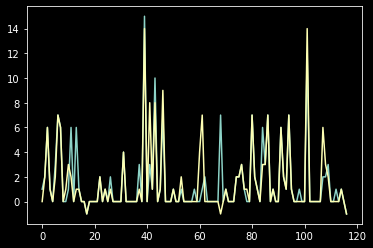

In [107]:
plt.plot(y_pred)
plt.plot(list(y_ts))